In [604]:
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

df = pd.read_csv(os.getenv("SLEEP_DATA_PATH") + './sleep_logs.csv')
df.head

<bound method NDFrame.head of      awake        time
0        0  1670956744
1        1  1670959042
2        0  1670967172
3        1  1670975558
4        0  1670980074
..     ...         ...
776      1  1672927201
777      0  1672936201
778      1  1672940401
779      0  1672950601
780      1  1672951938

[781 rows x 2 columns]>

df before resample:       awake                time
0        0 2022-12-13 18:39:00
1        1 2022-12-13 19:17:00
2        0 2022-12-13 21:33:00
3        1 2022-12-13 23:53:00
4        0 2022-12-14 01:08:00
..     ...                 ...
776      1 2023-01-05 14:00:00
777      0 2023-01-05 16:30:00
778      1 2023-01-05 17:40:00
779      0 2023-01-05 20:30:00
780      1 2023-01-05 20:52:00

[781 rows x 2 columns]


/var/folders/f3/2m9x7fn52vvff8bf3jkc2hjh0000gn/T/ipykernel_32757/4250788914.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.asfreq('1min').reset_index().append(df.iloc[-1]).reset_index(drop=True)


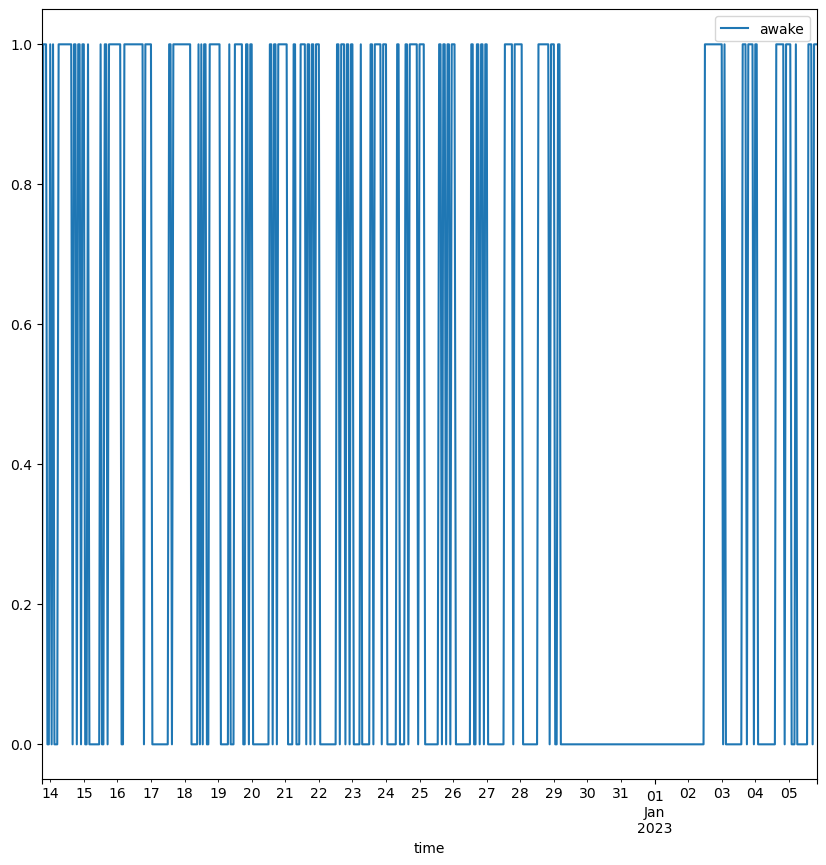

In [605]:
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'],unit='s',infer_datetime_format=True)
df['time'] = df["time"].dt.round("min")
print('df before resample: ', df)

df = df.set_index('time')

df = df.asfreq('1min').reset_index().append(df.iloc[-1]).reset_index(drop=True)
df.drop(df.tail(1).index,inplace=True) # drop last row
df['awake'] = df['awake'].ffill().astype(int)

new_df.drop(new_df.tail(1).index,inplace=True) # drop last row


# Frequency is too high for ARIMA to model reasonably...reduce resolution
# to hourly instead of every 3 minutes. Could try increasing resolution once have more data

df = df.set_index('time')
df = df.resample('60min').sum()

df["awake"] = np.where(df["awake"] >= 30, 1, 0)

df.plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

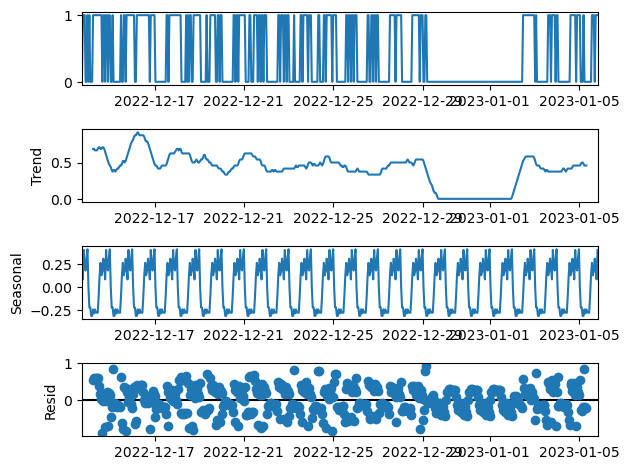

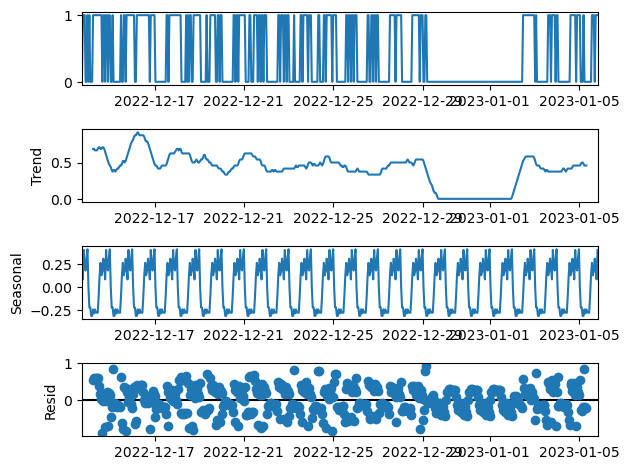

In [606]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_data = seasonal_decompose(df, model="additive", period=24)
decompose_data.plot()

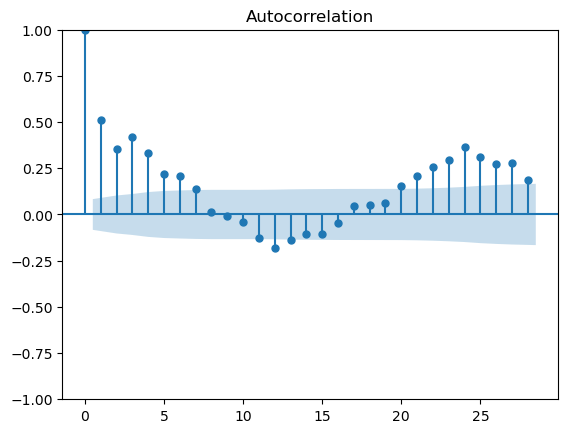

In [607]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df);

/var/folders/f3/2m9x7fn52vvff8bf3jkc2hjh0000gn/T/ipykernel_32757/842070095.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


            awake
count  555.000000
mean     0.416216
std      0.493375
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
test
189
testtt:  0
testtt:  1
testtt:  2
testtt:  3
testtt:  4
testtt:  5
testtt:  6
testtt:  7
testtt:  8
testtt:  9
testtt:  10
testtt:  11
testtt:  12
testtt:  13
testtt:  14
testtt:  15
testtt:  16
testtt:  17
testtt:  18
testtt:  19
testtt:  20
testtt:  21
testtt:  22
testtt:  23
testtt:  24
testtt:  25
testtt:  26
testtt:  27
testtt:  28
testtt:  29
testtt:  30
testtt:  31
testtt:  32
testtt:  33
testtt:  34
testtt:  35
testtt:  36
testtt:  37
testtt:  38
testtt:  39
testtt:  40
testtt:  41
testtt:  42
testtt:  43
testtt:  44
testtt:  45
testtt:  46
testtt:  47
testtt:  48
testtt:  49
testtt:  50
testtt:  51
testtt:  52
testtt:  53
testtt:  54
testtt:  55
testtt:  56
testtt:  57
testtt:  58
testtt:  59
testtt:  60
testtt:  61
testtt:  62
testtt:  63
testtt:  64
testtt:  65
testtt:  66
testtt:  67
testtt:  68
testtt:  69

/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


testtt:  71
testtt:  72
testtt:  73
testtt:  74
testtt:  75
testtt:  76
testtt:  77
testtt:  78
testtt:  79
testtt:  80
testtt:  81
testtt:  82
testtt:  83
testtt:  84
testtt:  85
testtt:  86
testtt:  87
testtt:  88
testtt:  89
testtt:  90
testtt:  91
testtt:  92
testtt:  93
testtt:  94
testtt:  95
testtt:  96
testtt:  97
testtt:  98
testtt:  99
testtt:  100
testtt:  101
testtt:  102
testtt:  103
testtt:  104
testtt:  105
testtt:  106
testtt:  107
testtt:  108
testtt:  109
testtt:  110
testtt:  111
testtt:  112
testtt:  113
testtt:  114
testtt:  115
testtt:  116
testtt:  117
testtt:  118
testtt:  119
testtt:  120
testtt:  121
testtt:  122
testtt:  123
testtt:  124
testtt:  125
testtt:  126
testtt:  127
testtt:  128
testtt:  129
testtt:  130
testtt:  131
testtt:  132
testtt:  133
testtt:  134
testtt:  135
testtt:  136
testtt:  137
testtt:  138
testtt:  139
testtt:  140
testtt:  141
testtt:  142
testtt:  143
testtt:  144
testtt:  145
testtt:  146
testtt:  147
testtt:  148
testtt:  149
te

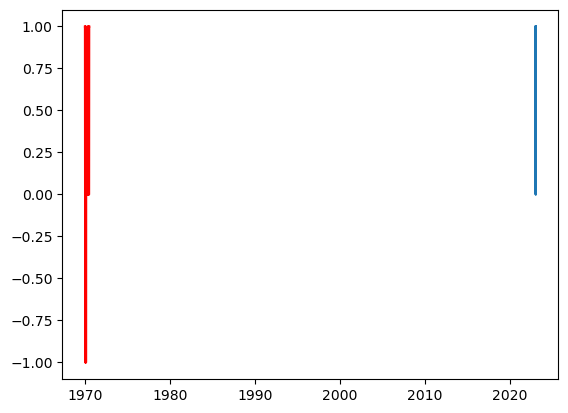

In [430]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.awake
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0), seasonal_order=(2,1,0,24))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	yhat = round(output[0])
	predictions.append(yhat)
	obs = test.iloc[t]
	history.append(obs)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# forecast against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [608]:
# model params empirically decided via auto_arima down below

model = ARIMA(df.awake, order=(5,1,0), seasonal_order=(2,1,0,24))
# (6,1,0)(2,1,0)[24]
# ARIMA(5,1,0)(2,1,0)[24] 
# (4,0,1)(0,0,2)[24]
# (3,0,0)(2,1,0)[24]
# (0,0,0)(2,1,0)[24] 
# (1,0,1)(2,1,0)[24]
model_fit = model.fit()

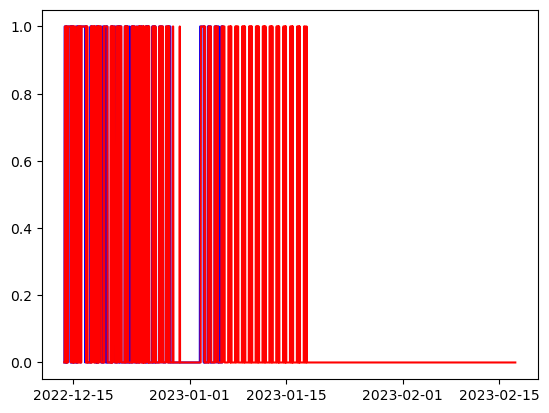

In [609]:
import numpy as np

preds = model_fit.predict(start=0, end=len(df.awake)+1020) # forecast N hours from end of training data

df2 = preds.to_frame()
df2['test'] = preds.index
df2.set_index('test')
df2 = df2.drop('test', axis=1)

df2['predicted_mean'] = np.where(preds >= 0.5, 1,0)

pyplot.plot(df.awake, color='blue')
pyplot.plot(df2['predicted_mean'], color='red')
pyplot.show()

In [574]:
import datetime as dt
import random

df2 = df2[(df2.index >= '2023-01-06')]

df2 = df2.reset_index()
df2['time'] = (df2['index'] - dt.datetime(1970,1,1)).dt.total_seconds().astype(int)
for i in range(len(df2)):
    noise = 60*60
    df2.at[i,'time'] = df2.at[i,'time'] + random.randint(-noise, noise)

df2 = df2.rename(columns={'predicted_mean': 'awake'})

print(df2)

                   index  awake        time
0    2023-01-06 00:00:00      1  1672966277
1    2023-01-06 01:00:00      1  1672967080
2    2023-01-06 02:00:00      0  1672972444
3    2023-01-06 03:00:00      0  1672973728
4    2023-01-06 04:00:00      0  1672976452
...                  ...    ...         ...
1013 2023-02-17 05:00:00      1  1676611708
1014 2023-02-17 06:00:00      0  1676610537
1015 2023-02-17 07:00:00      0  1676620037
1016 2023-02-17 08:00:00      0  1676623554
1017 2023-02-17 09:00:00      0  1676623950

[1018 rows x 3 columns]


In [575]:
# output all to csv for use in app
# TODO: port to raspberry pi and fit + inference on demand within app

header = ["awake", "time"]
df2.to_csv('output.csv', columns = header, index=False)

In [582]:
import pmdarima as pm

model = pm.auto_arima(df.awake, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=24,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# from pmdarima.arima import AutoARIMA
# from pmdarima.pipeline import Pipeline
# from pmdarima.preprocessing import FourierFeaturizer

# print(data_daytime.describe())

# pipeline = Pipeline([
#     ("fourier", FourierFeaturizer(m=240, k=3)),
#     ("arima", AutoARIMA(test='adf', max_p=5, max_q=5, seasonal=True, stepwise=True,
#                         suppress_warnings=True,
#                         error_action='trace', trace=1))
# ])

# pipeline.fit(data_daytime.awake)

Performing stepwise search to minimize aic


/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=31.95 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=1208.945, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=981.931, Time=3.52 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=22.22 sec


/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,0)(0,1,0)[24]             : AIC=1128.859, Time=0.35 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=899.736, Time=14.04 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=68.24 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=34.90 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=990.998, Time=9.38 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=799.509, Time=13.38 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=869.183, Time=2.62 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=62.60 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=31.80 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=772.019, Time=17.24 sec
 ARIMA(3,1,0)(1,1,0)[24]             : AIC=844.396, Time=3.98 sec
 ARIMA(3,1,0)(2,1,1)[24]             : AIC=inf, Time=111.27 sec
 ARIMA(3,1,0)(1,1,1)[24]             : AIC=inf, Time=47.97 sec
 ARIMA(4,1,0)(2,1,0)[24]             : AIC=756.980, Time=17.49 sec
 ARIMA(4,1,0)(1,1,0)[24]             : AIC=830.733, Time=3.96 sec
 ARIMA(4,1,0)(2,1,1)[2

/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(6,1,1)(2,1,0)[24]             : AIC=inf, Time=231.15 sec


/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,1)(2,1,0)[24]             : AIC=inf, Time=128.46 sec


/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(7,1,1)(2,1,0)[24]             : AIC=inf, Time=174.00 sec
 ARIMA(6,1,0)(2,1,0)[24] intercept   : AIC=748.511, Time=249.55 sec

Best model:  ARIMA(6,1,0)(2,1,0)[24]          
Total fit time: 1821.793 seconds


In [583]:
print('model: ', model)
model.summary()

model:   ARIMA(6,1,0)(2,1,0)[24]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  671
Model:             SARIMAX(6, 1, 0)x(2, 1, 0, 24)   Log Likelihood                -364.256
Date:                            Tue, 10 Jan 2023   AIC                            746.512
Time:                                    12:09:41   BIC                            786.749
Sample:                                12-13-2022   HQIC                           762.123
                                     - 01-10-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6555      0.036    -18.188      0.000      -0.726      -0.585
ar.L2         -0.6303      0.043    -14.632      0.000      -0.715      -0.546
ar.L3         -0.4100      0.048     -8.632      0.000      -0.503      -0.317
ar.L4         -0.2849      0.049     -5.780      0.000      -0.381      -0.188
ar.L5         -0.1766      0.044     -3.982      0.000      -0.264      -0.090
ar.L6         -0.0566      0.037     -1.531      0.126      -0.129       0.016
ar.S.L24      -0.5971      0.035    -16.999      0.000      -0.666      -0.528
ar.S.L48      -0.3450      0.034    -10.224      0.000      -0.411      -0.279
sigma2         0.1775      0.009     19.956      0.000       0.160       0.195
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.89
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [291]:
from tbats import TBATS, BATS

# Janky, keeping around, but ARIMA is best currently

estimator = TBATS()
model = estimator.fit(data_daytime.awake)
y_forecast = model.forecast(steps=240)

/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/caleb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.po

[0.00617178 0.01167685 0.01685776 0.02173363 0.02632239 0.03064097
 0.03470526 0.03853025 0.04213002 0.04551782 0.04870616 0.05170675
 0.05453068 0.05718832 0.05968948 0.06204337 0.06425867 0.06634352
 0.06830561 0.07015218 0.07189002 0.07352553 0.07506474 0.07651332
 0.07787661 0.07915962 0.08036709 0.08150347 0.08257293 0.08357942
 0.08452665 0.08541811 0.08625707 0.08704664 0.08778971 0.08848904
 0.08914718 0.08976658 0.0903495  0.0908981  0.0914144  0.0919003
 0.09235758 0.09278795 0.09319297 0.09357414 0.09393287 0.09427048
 0.09458821 0.09488723 0.09516865 0.09543349 0.09568274 0.09591731
 0.09613808 0.09634584 0.09654137 0.09672539 0.09689857 0.09706155
 0.09721494 0.0973593  0.09749516 0.09762301 0.09774334 0.09785659
 0.09796316 0.09806346 0.09815786 0.09824669 0.0983303  0.09840898
 0.09848303 0.09855272 0.09861831 0.09868004 0.09873813 0.0987928
 0.09884425 0.09889267 0.09893824 0.09898113 0.09902149 0.09905947
 0.09909522 0.09912887 0.09916053 0.09919033 0.09921837 0.099244

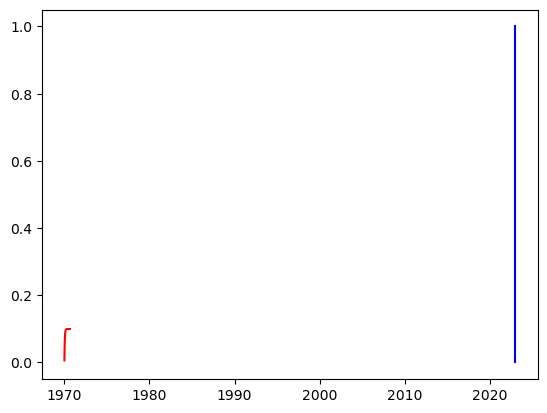

In [290]:
print(y_forecast)

pyplot.plot(data_test_day.awake, color='blue')
pyplot.plot(y_forecast, color='red')
pyplot.show()

data_daytime:               awake
count  3120.000000
mean      0.457372
std       0.498259
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
len:  240
2022-12-27 00:03:00-06:00    0.000028
2022-12-27 00:09:00-06:00    0.000028
2022-12-27 00:15:00-06:00    0.000028
2022-12-27 00:21:00-06:00    0.000028
2022-12-27 00:27:00-06:00    0.000028
                               ...   
2022-12-27 23:33:00-06:00    0.000028
2022-12-27 23:39:00-06:00    0.000028
2022-12-27 23:45:00-06:00    0.000028
2022-12-27 23:51:00-06:00    0.000028
2022-12-27 23:57:00-06:00    0.000028
Freq: 6T, Name: alpha=0.2, Length: 240, dtype: float64


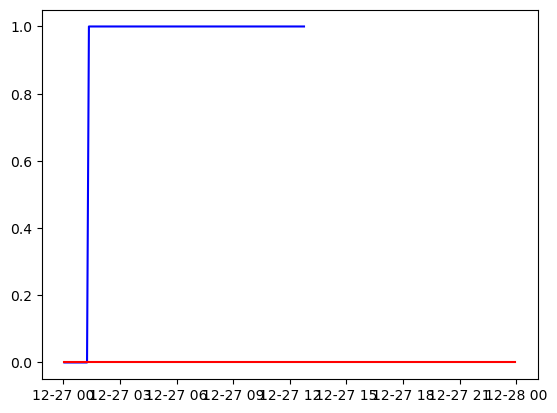

In [297]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# smoothing_model = SimpleExpSmoothing(df2.awake, initialization_method="heuristic")
smoothing_model = ExponentialSmoothing(df2)
smoothing_model_fit = smoothing_model.fit(smoothing_level=0.2)
yhat = smoothing_model_fit.forecast(240).rename('alpha=0.2')

print('len: ', len(yhat))

print(yhat)

pyplot.plot(data_test_day.awake, color='blue')
pyplot.plot(yhat, color='red')
pyplot.show()

# Janky, keeping around, but SARIMA is best currently